## *`Enhancing Loan Approval Status Prediction Using Machine Learning`*

[![Approved-Rejected.jpg](https://i.postimg.cc/SRpfkFNV/Approved-Rejected.jpg)](https://postimg.cc/XGQCkP5y)

In [447]:
# Import necessary libraries for data manipulation and analysis
import pandas as pd  # Data manipulation with pandas
import numpy as np   # Numerical operations with numpy

# Import libraries for data visualization
import matplotlib.pyplot as plt   # Plotting library
import seaborn as sns             # Enhanced data visualization library based on matplotlib

# Import libraries for data preprocessing and encoding
from sklearn import preprocessing   # For data preprocessing and feature scaling
from sklearn.utils import resample  # For upsampling the minority class

# Import libraries for model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV   # For train-test split and grid search
from sklearn.tree import DecisionTreeClassifier   # Decision Tree classifier
from sklearn.model_selection import cross_val_score   # For cross-validation
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss)   # Performance metrics
from sklearn.ensemble import RandomForestClassifier   # Random Forest classifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score   # Confusion matrix and ROC curve

# Import SHAP for interpretability of model predictions
import shap   

In [448]:
# Load the dataset into DataFrame df1
df1 = pd.read_csv('C:\Escritorio\LoanProject\Data\LoanStatus.csv')

## Data Preprocessing and Exploration
Let's start by exploring the dataset to gain insights about its structure and content.
I will examine the first few rows, data types, and check for missing values.

In [449]:
df1 # Display the DataFrame df1 to view its contents

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y


In [450]:
df1.rename(columns=str.lower, inplace=True) # Renaming column names to lowercase for consistency

In [451]:
df1.dtypes # Checking data types and missing values

gender                 object
married                object
dependents             object
education              object
self_employed          object
applicant_income        int64
coapplicant_income    float64
loan_amount             int64
term                  float64
credit_history        float64
area                   object
status                 object
dtype: object

In [452]:
df1.isna().sum() # Checking for missing values in the DataFrame

gender                13
married                3
dependents            15
education              0
self_employed         32
applicant_income       0
coapplicant_income     0
loan_amount            0
term                  14
credit_history        50
area                   0
status                 0
dtype: int64

In [453]:
# Define a list of categorical columns to handle missing values
columns_fill_mode = ['gender', 'married', 'dependents', 'self_employed', 'term', 'credit_history']

# Loop through each categorical column in the list
for col in columns_fill_mode:
    df1[col].fillna(df1[col].mode()[0], inplace=True) # Use the mode (most frequent value) of the column to fill the missing values inplace

## Data Visualization
Various visualizations are created to gain insights into the data. I start by visualizing the count of loan statuses across different categorical variables such as gender, education, self_employed, and marital status using countplots and pie charts. Additionally, I use boxplots and histograms to understand the distribution and presence of outliers in numerical variables like applicant_income, coapplicant_income, loan_amount, and term.

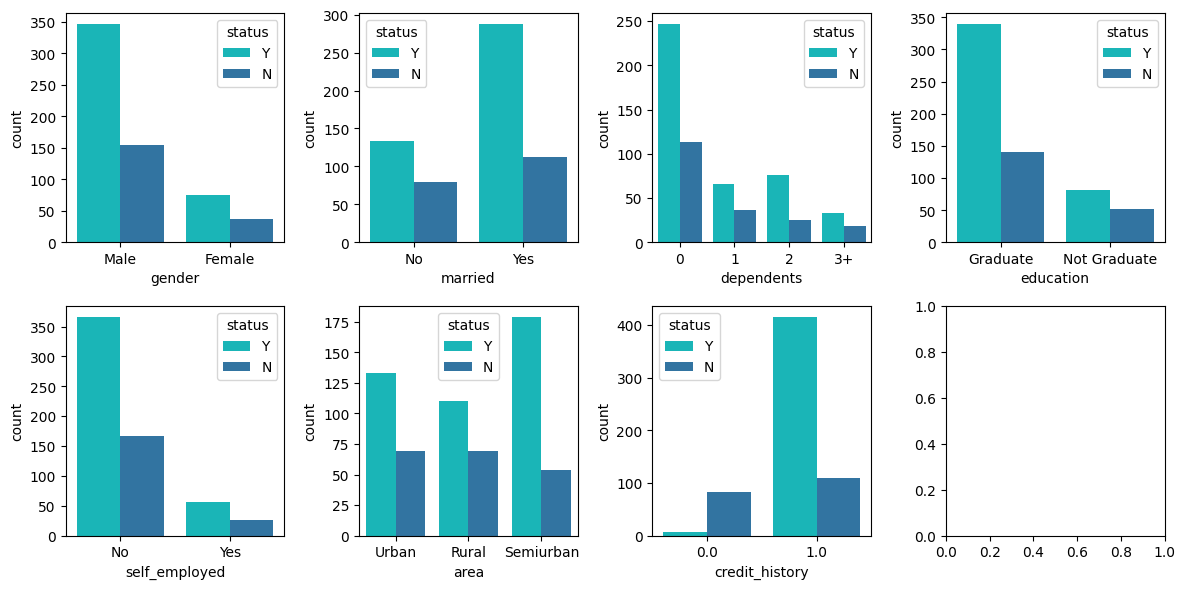

In [454]:
# Define the categorical variables to visualize
categorical_vars = ['gender', 'married', 'dependents', 'education', 'self_employed', 'area', 'credit_history']

# Create a figure with two rows and four columns for subplots, and set the overall size
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

# Flatten the 2D array of subplots to a 1D array for easier iteration
axs = axs.flatten()

colors = ['#00ced1', '#1f77b4']

# Loop through each categorical variable and create a countplot for each
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, hue='status', data=df1, ax=axs[i], palette=colors) # Create a countplot for the current categorical variable, with 'status' as hue for differentiation
    axs[i].set_xticklabels(axs[i].get_xticklabels()) # Set the tick labels for better readability

fig.tight_layout() # Adjust the layout of the subplots to avoid overlapping
plt.show()

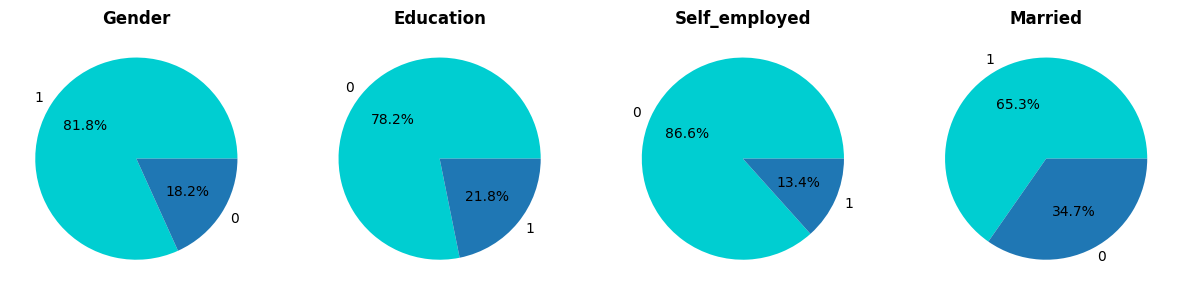

In [501]:
# Define the categorical variables to visualize
variables = ['gender', 'education', 'self_employed', 'married']

# Create a figure with four subplots in a horizontal layout
fig, ax = plt.subplots(1, 4, figsize=(15, 10))

colors = ['#00ced1', '#1f77b4']

# Loop through each categorical variable and create a pie chart for each
for i, var in enumerate(variables):
    pie_data = df1[var].value_counts() # Count the occurrences of each category in the variable
    pie_data.plot.pie(ax=ax[i], autopct='%1.1f%%', colors=colors) # Create a pie chart for the current variable in the corresponding subplot
    ax[i].set_ylabel('') # Remove the ylabel to avoid redundancy
    ax[i].set_title(var.capitalize(), fontweight='bold') # Set the title for the subplot with the capitalized variable name
    
plt.show()

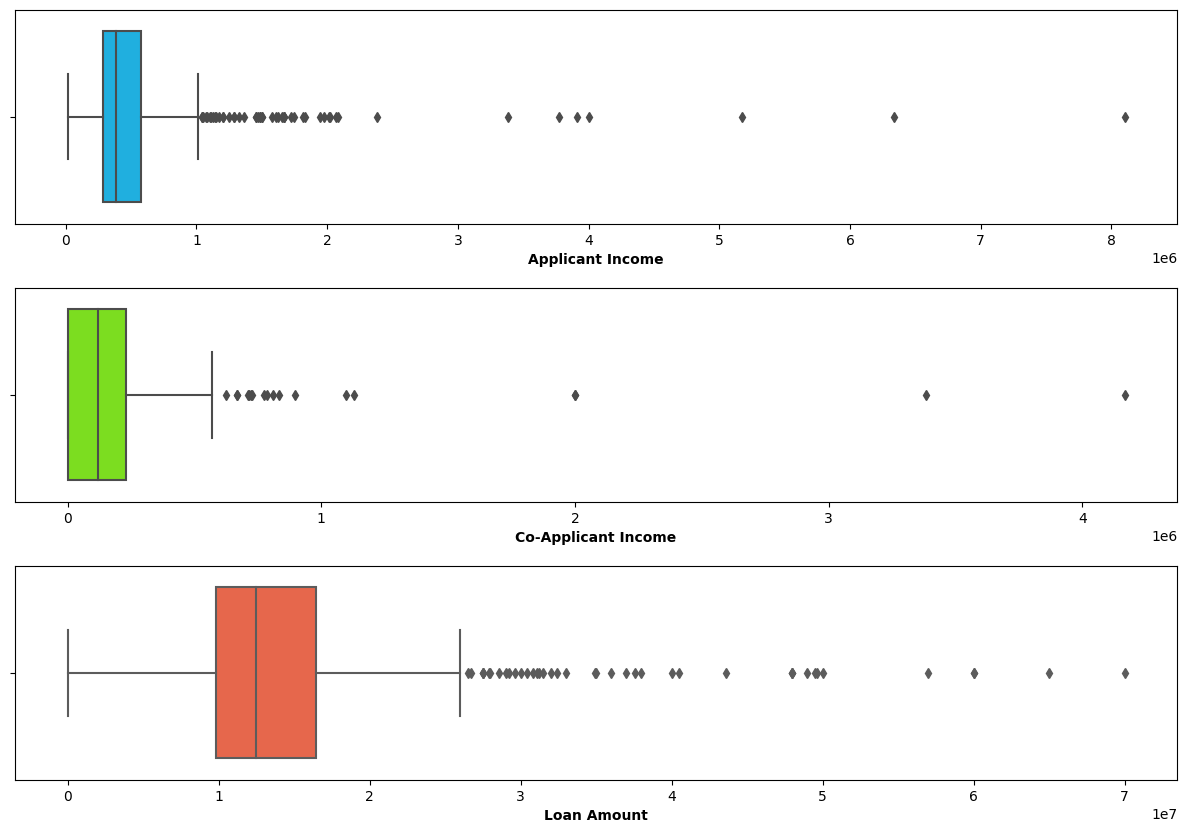

In [456]:
# Create a figure with three subplots in a vertical layout
fig, ax = plt.subplots(3, 1, figsize=(15, 10))

# Adjust the vertical spacing between subplots
plt.subplots_adjust(hspace=0.3)

colors = ['#00BFFF', '#7CFC00', '#FF5733', '#FF1493']

# Create a boxplots for 'applicant_income', 'coapplicant_income', and 'loan_amount'
sns.boxplot(ax=ax[0], data=df1, x='applicant_income', color=colors[0])
ax[0].set_xlabel('Applicant Income', fontweight='bold')
sns.boxplot(ax=ax[1], data=df1, x='coapplicant_income', color=colors[1])
ax[1].set_xlabel('Co-Applicant Income', fontweight='bold')
sns.boxplot(ax=ax[2], data=df1, x='loan_amount', color=colors[2])
ax[2].set_xlabel('Loan Amount', fontweight='bold')
plt.show()

There are many outliers from the Applicant Income, Co-Applicant Income and Loan Amount feature. This might affect later in creating a machine learning to predict loan approval.

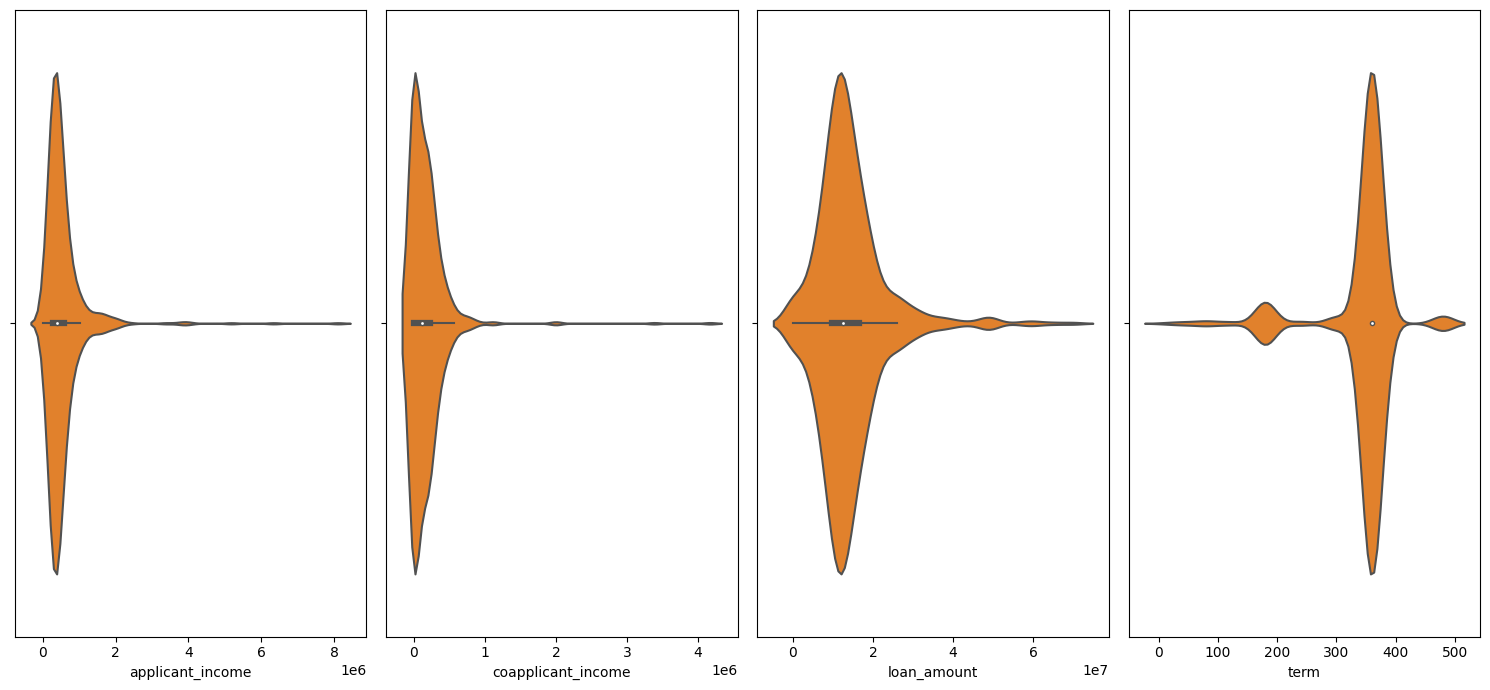

In [457]:
# List of numerical variables to visualize
numerical_vars = ['applicant_income', 'coapplicant_income', 'loan_amount', 'term']

# Create subplots for the violin plots
fig, axs = plt.subplots(nrows= 1, ncols= 4, figsize= (15,7))

colors = ['#ff7f0e']

# Create violin plots for each numerical variable
for i, var in enumerate(numerical_vars):
    sns.violinplot(x= var, data= df1, ax= axs[i], palette= colors)

fig.tight_layout() # Adjust the layout of the subplots for better spacing
plt.show()

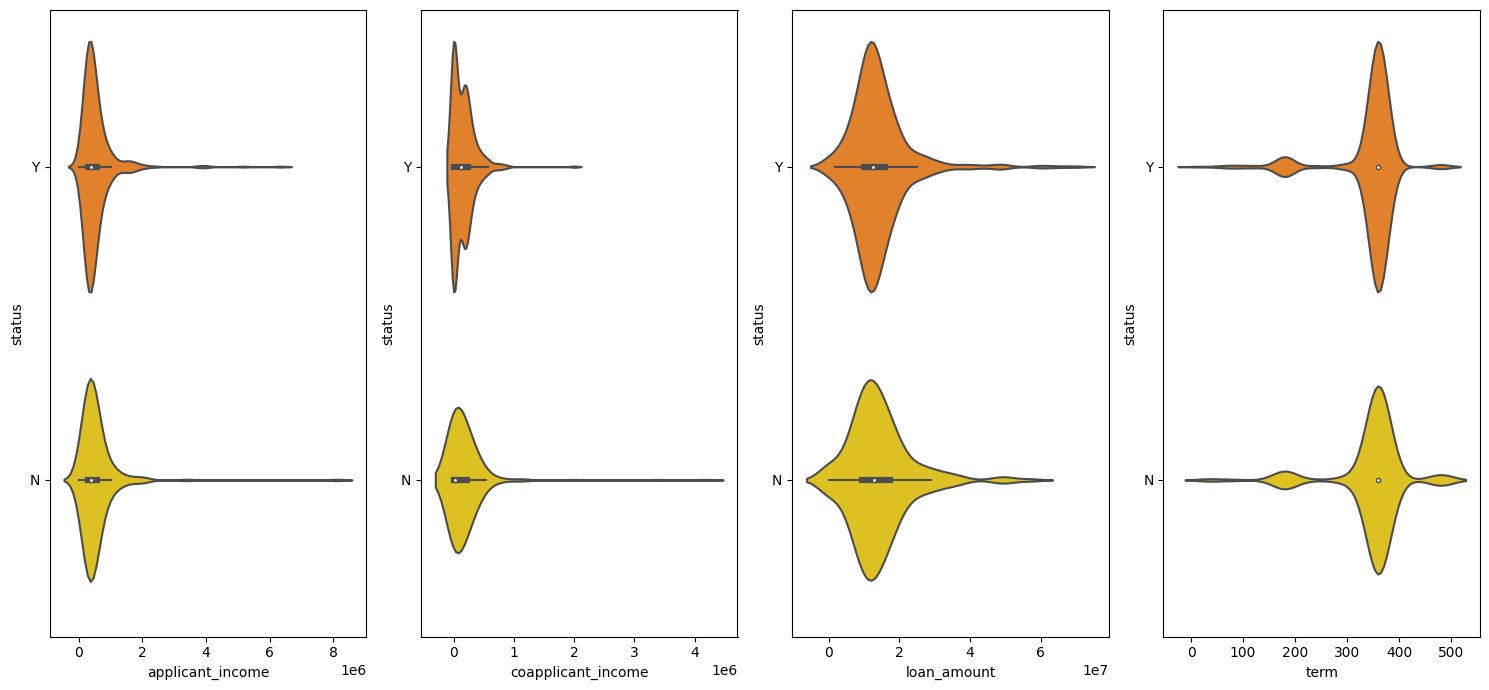

In [458]:
# List of numerical variables to visualize
numerical_vars = ['applicant_income', 'coapplicant_income', 'loan_amount', 'term']

# Create subplots for the violin plots
fig, axs = plt.subplots(nrows= 1, ncols= 4, figsize= (15, 7))

colors = ['#ff7f0e', '#fcd703']

# Create violin plots for each numerical variable, with 'status' on the y-axis
for i, var in enumerate(numerical_vars):
    sns.violinplot(x= var, y= 'status', data= df1, ax= axs[i], palette= colors)

fig.tight_layout() # Adjust the layout for better visualization
plt.show()

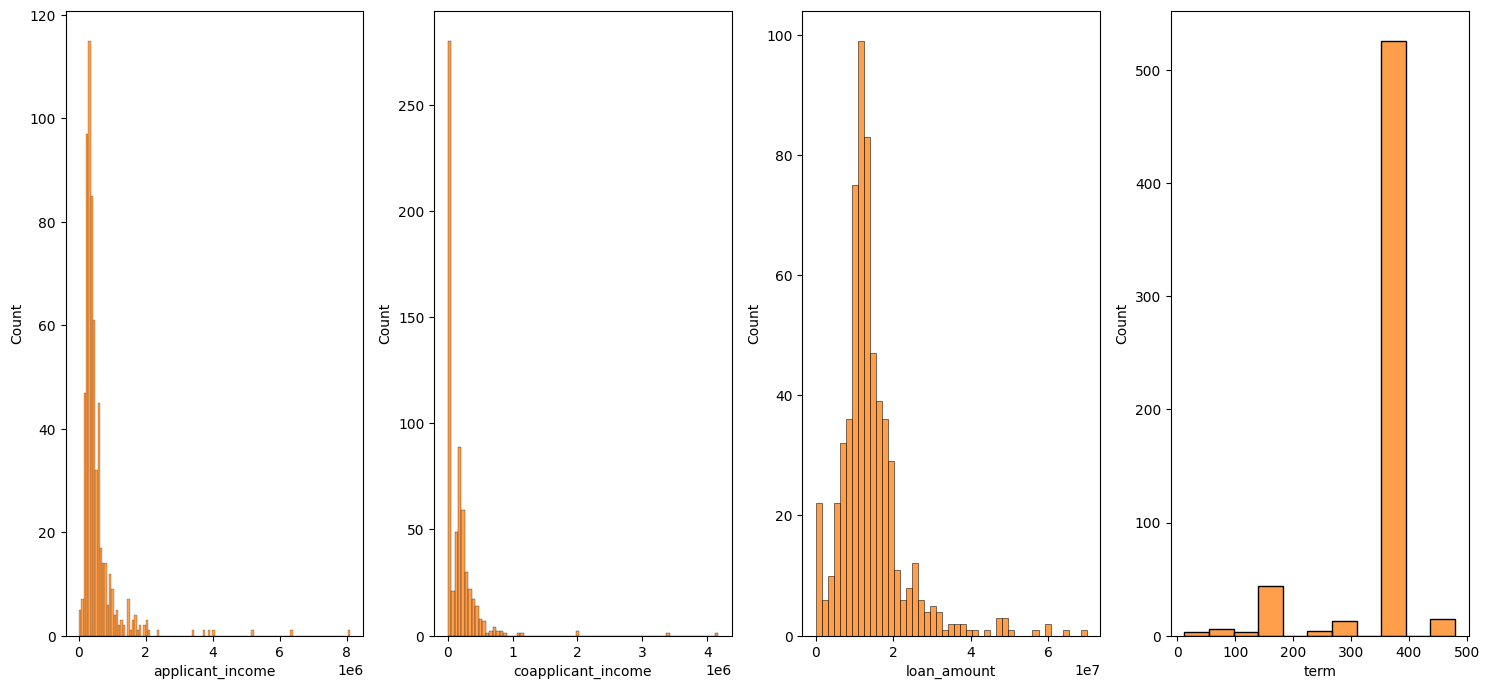

In [459]:
# List of numerical variables to visualize
numerical_vars = ['applicant_income', 'coapplicant_income', 'loan_amount', 'term']

# Create subplots for the histograms, arranging them in a row (1 row, 4 columns)
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15, 7))

colors = ['#ff7f0e']
 
# Create a histogram for each numerical variable
for i, var in enumerate(numerical_vars):
    sns.histplot(x=var, data=df1, ax=axs[i], color=colors[0])

fig.tight_layout() # Adjust the layout of the subplots for better spacing
plt.show()

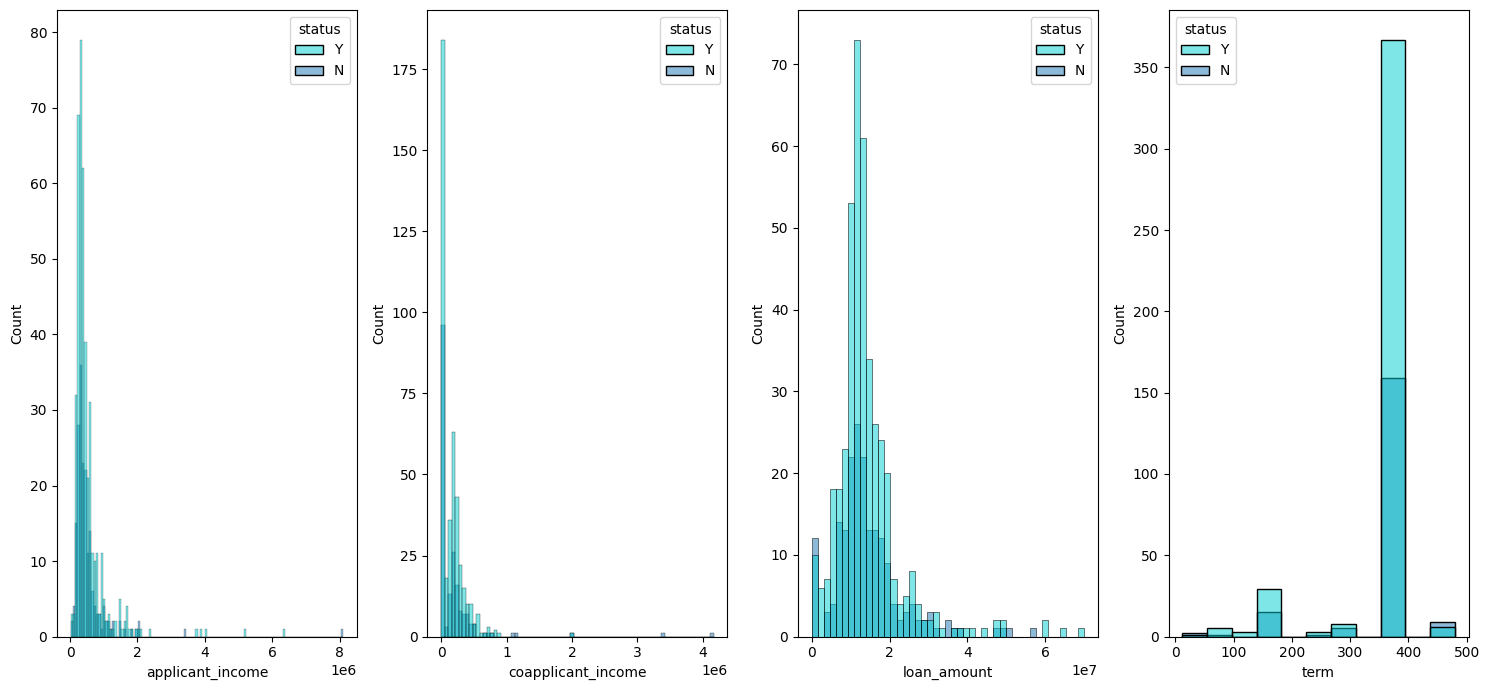

In [460]:
# List of numerical variables to visualize
numerical_vars = ['applicant_income', 'coapplicant_income', 'loan_amount', 'term']

# Create subplots for the histograms, arranging them in a row (1 row, 4 columns)
fig, axs = plt.subplots(nrows= 1, ncols= 4, figsize= (15,7))

colors = ['#00ced1', '#1f77b4']

# Create a histogram for each numerical variable with respect to the 'status' variable
for i, var in enumerate(numerical_vars):
    sns.histplot(x= var, data= df1, hue= 'status', ax= axs[i], palette= colors)

fig.tight_layout() # Adjust the layout of the subplots for better spacing
plt.show()

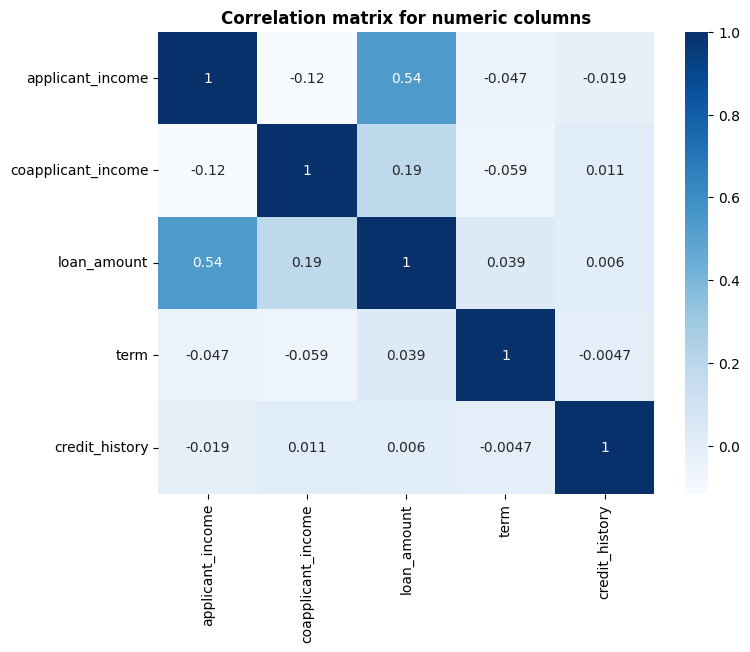

In [461]:
# Get the numeric columns in the DataFrame
numeric_columns = df1.select_dtypes(include=['int64', 'float64']).columns

# Create a figure with a heatmap to display the correlation matrix
plt.figure(figsize=(8, 6))

# Create the heatmap using seaborn's heatmap function
sns.heatmap(df1[numeric_columns].corr(), annot=True, cmap='Blues')
plt.title('Correlation matrix for numeric columns', fontweight='bold') # Set the title for the plot
plt.show()

In [462]:
# Calculate the 'status' percentage distribution
count = len(df1['status'])
count_y = df1['status'].value_counts()[0]
count_n = count - count_y

# Calculate the percentage of 'Y' (Yes) occurrences in the 'status' variable
percentage_y = (count_y / count) * 100
# Calculate the percentage of 'N' (No) occurrences in the 'status' variable
percentage_n = 100 - percentage_y

# Display the results
print(f'Y: {count_y} {percentage_y:.2f}%')
print(f'N: {count_n} {percentage_n:.2f}%')

Y: 422 68.73%
N: 192 31.27%


## Label Encoding for Object Datatype
Before I proceed with modeling, I perform label encoding on the categorical variables to convert them into numerical format.

In [463]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df1.select_dtypes(include= ['object']).columns:
    print(f'{col}: {df1[col].unique()}') # Print the column name and the unique values

gender: ['Male' 'Female']
married: ['No' 'Yes']
dependents: ['0' '1' '2' '3+']
education: ['Graduate' 'Not Graduate']
self_employed: ['No' 'Yes']
area: ['Urban' 'Rural' 'Semiurban']
status: ['Y' 'N']


In [464]:

# Loop over each column in the DataFrame where dtype is 'object'
for col in df1.select_dtypes(include= ['object']).columns:
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df1[col].unique())
   
    df1[col] = label_encoder.transform(df1[col])  # Transform the column using the encoder

    print(f'{col}: {df1[col].unique()}') # Print the column name and the unique encoded values

gender: [1 0]
married: [0 1]
dependents: [0 1 2 3]
education: [0 1]
self_employed: [0 1]
area: [2 0 1]
status: [1 0]


In [465]:
# Check if the Label 'Status' is balanced or not
print(df1['status'].unique())

[1 0]


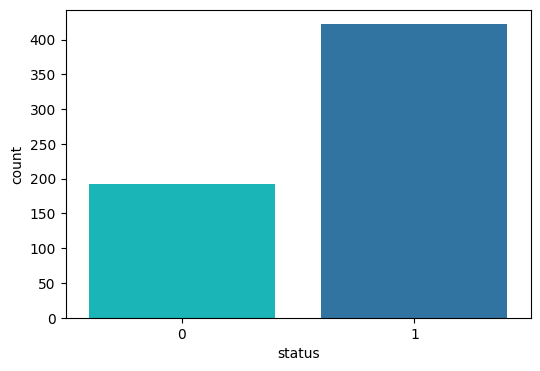

In [466]:
# Sort the DataFrame by the 'status' column
df1_sorted = df1.sort_values(by='status')

colors = ['#00ced1', '#1f77b4']

# Create a count plot for 'status' with the sorted DataFrame
plt.figure(figsize=(6, 4))
sns.countplot(x='status', data=df1_sorted, palette= colors)
plt.show()

## Upsampling Minority Class to Balance the Label
To address class imbalance in the target variable 'status', I upsample the minority class ('Not Approved') to match the number of instances in the majority class ('Approved'). This helps create a more balanced dataset.

In [467]:
# Create two different DataFrame of majority and minority class
df1_majority = df1[(df1['status'] == 1)]
df1_minority = df1[(df1['status'] == 0)]

In [468]:
df1_majority # Display the DataFrame df1_majority to view its contents

,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,term,credit_history,area,status
0,1,0,0,0,0,584900,0.0,15000000,360.0,1.0,2,1
2,1,1,0,0,1,300000,0.0,6600000,360.0,1.0,2,1
3,1,1,0,1,0,258300,235800.0,12000000,360.0,1.0,2,1
4,1,0,0,0,0,600000,0.0,14100000,360.0,1.0,2,1
5,1,1,2,0,1,541700,419600.0,26700000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,323200,195000.0,10800000,360.0,1.0,0,1
609,0,0,0,0,0,290000,0.0,7100000,360.0,1.0,0,1
610,1,1,3,0,0,410600,0.0,4000000,180.0,1.0,0,1
611,1,1,1,0,0,807200,24000.0,25300000,360.0,1.0,2,1


In [469]:
df1_minority # Display the DataFrame df1_minority to view its contents

,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,term,credit_history,area,status
1,1,1,1,0,0,458300,150800.0,12800000,360.0,1.0,0,0
7,1,1,3,0,0,303600,250400.0,15800000,360.0,0.0,1,0
9,1,1,1,0,0,1284100,1096800.0,34900000,360.0,1.0,1,0
13,1,0,0,0,0,185300,284000.0,11400000,360.0,1.0,0,0
17,0,0,0,0,0,351000,0.0,7600000,360.0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
596,1,1,2,1,1,638300,100000.0,18700000,360.0,1.0,0,0
597,1,0,0,0,0,298700,0.0,8800000,360.0,0.0,1,0
600,0,0,3,0,0,41600,4166700.0,35000000,180.0,1.0,2,0
605,1,1,0,1,0,240000,380000.0,0,180.0,1.0,2,0


In [470]:
# Upsample minority class
df1_minority_upsampled = resample(df1_minority,
                                  replace= True,
                                  n_samples= 422,
                                  random_state= 0)
# Combine majority class with upsampled minority class
df1_upsampled = pd.concat([df1_minority_upsampled, df1_majority])

In [471]:
df1_upsampled # Display the DataFrame df1_upsampled to view its contents

,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,term,credit_history,area,status
554,1,1,0,0,0,359300,426600.0,13200000,180.0,0.0,0,0
148,0,0,0,0,0,1000000,166600.0,22500000,360.0,1.0,0,0
378,1,0,0,0,0,306900,0.0,7100000,480.0,1.0,2,0
202,1,1,3,1,0,399200,0.0,0,180.0,1.0,2,0
338,0,0,3,1,0,183000,0.0,0,360.0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,323200,195000.0,10800000,360.0,1.0,0,1
609,0,0,0,0,0,290000,0.0,7100000,360.0,1.0,0,1
610,1,1,3,0,0,410600,0.0,4000000,180.0,1.0,0,1
611,1,1,1,0,0,807200,24000.0,25300000,360.0,1.0,2,1


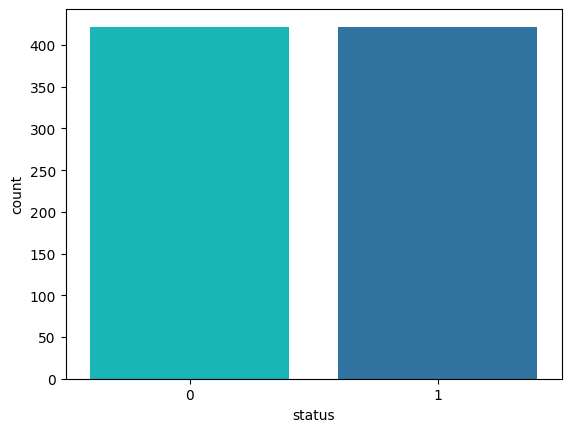

In [472]:
# Create a count plot for the 'status' variable in the DataFrame df1_upsampled
colors = ['#00ced1', '#1f77b4']
sns.countplot(x='status', data=df1_upsampled, palette= colors)
plt.show()

In [473]:
df1_upsampled.dtypes # Print the data types of each column in the DataFrame df1_upsampled

gender                  int32
married                 int32
dependents              int32
education               int32
self_employed           int32
applicant_income        int64
coapplicant_income    float64
loan_amount             int64
term                  float64
credit_history        float64
area                    int32
status                  int32
dtype: object

In [474]:
# Calculate the 'status' percentage distribution in the upsampled DataFrame
count = len(df1_upsampled['status'])
count_y = df1_upsampled['status'].value_counts()[0]
count_n = count - count_y

percentage_y = (count_y / count) * 100
percentage_n = 100 - percentage_y

# Print the percentage distribution for 'Y' (Yes) and 'N' (No) in 'status'
print(f'Y: {count_y} {percentage_y:.2f}%')
print(f'N: {count_n} {percentage_n:.2f}%')

print(df1_upsampled.shape) # Print the shape of the upsampled DataFrame after removing outliers

Y: 422 50.00%
N: 422 50.00%
(844, 12)


## Remove Outliers using IQR
Due to the presence of outliers in the applicant_income, coapplicant_income, and loan_amount features, I use the Interquartile Range (IQR) method to remove them from the upsampled DataFrame.

In [475]:
# Specify the colums to remove outliers from DataFrame
column_names = ['applicant_income', 'coapplicant_income', 'loan_amount', 'term']

# Remove outliers for each selected column using the IQR method
for column_name in column_names:
    Q1 = df1_upsampled[column_name].quantile(0.25)
    Q3 = df1_upsampled[column_name].quantile(0.75)
    IQR = Q3 - Q1
    df1_upsampled = df1_upsampled[~((df1_upsampled[column_name] < (Q1 - 1.5 * IQR)) | (df1_upsampled[column_name] > (Q3 + 1.5 * IQR)))]

df1_upsampled.head() # Display the DataFrame after removing outliers

,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,term,credit_history,area,status
148,0,0,0,0,0,1000000,166600.0,22500000,360.0,1.0,0,0
24,1,1,1,0,0,371700,292500.0,15100000,360.0,1.0,1,0
57,1,1,0,0,0,336600,220000.0,13500000,360.0,1.0,0,0
107,1,0,0,1,0,733300,0.0,12000000,360.0,1.0,0,0
268,0,0,0,0,0,341800,0.0,13500000,360.0,1.0,0,0


In [476]:
df1_upsampled.shape # Check the shape after outlier

(570, 12)

## Correlation Matrix Visualization
A heatmap is created to visualize the correlation matrix of the upsampled DataFrame to identify relationships between numerical variables.

<Axes: >

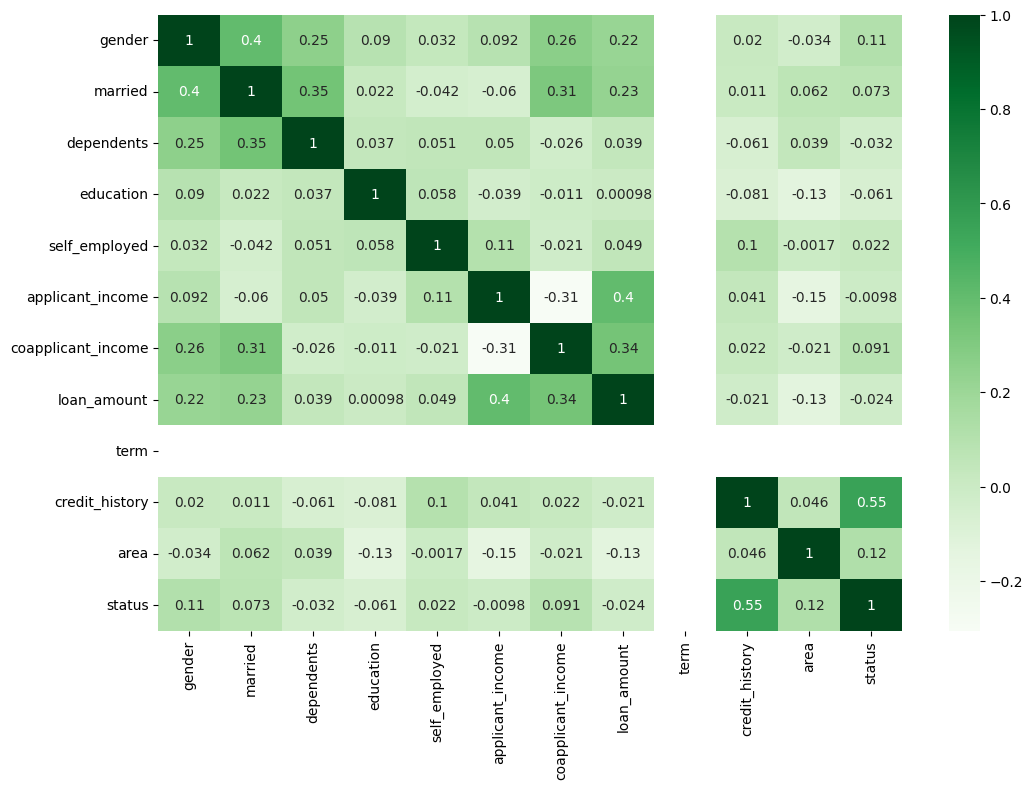

In [477]:
# Create a heatmap to visualize the correlation matrix of the upsampled DataFrame
plt.figure(figsize= (12, 8))
sns.heatmap(df1_upsampled.corr(), annot= True, cmap='Greens')

<Axes: >

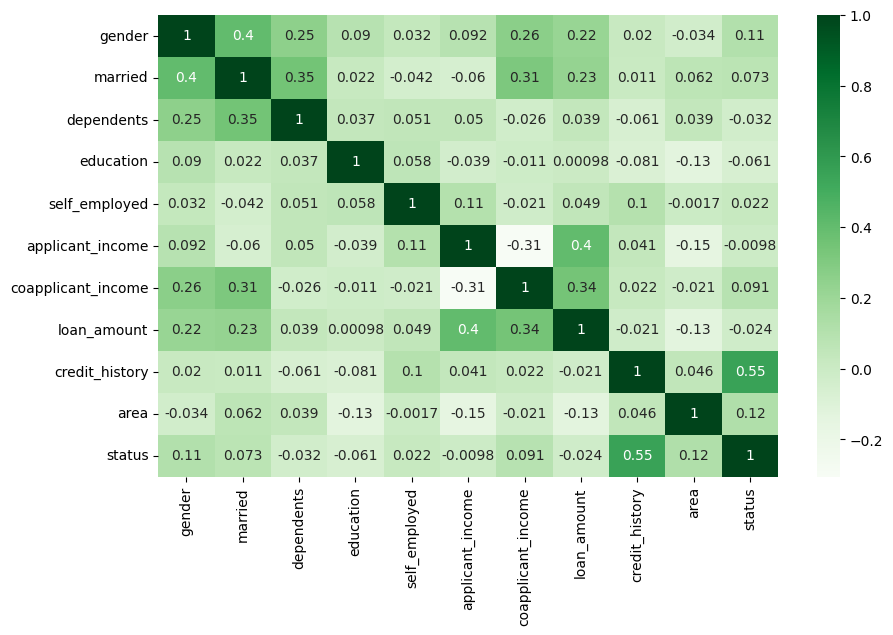

In [478]:
# Drop the 'term' column from the upsampled DataFrame
df1_upsampled.drop(columns='term', inplace=True)

# Create a heatmap to visualize the correlation matrix of the upsampled DataFrame
plt.figure(figsize=(10, 6))
sns.heatmap(df1_upsampled.corr(), fmt='.2g', annot=True, cmap='Greens')

## Train-Test Split
The upsampled dataset is split into training and testing sets to train and evaluate the models.

In [479]:
# Splitting the upsampled dataset into features (X) and the target variable (y)
X = df1_upsampled.drop('status', axis= 1)
y = df1_upsampled['status']

In [480]:
# Test size 20% and train size 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

## Decision Tree
I utilize the Decision Tree classifier and perform a grid search with cross-validation to find the best hyperparameters. The model is then fitted with the best hyperparameters, and its performance metrics such as accuracy, F1 score, precision, recall, and Jaccard score are evaluated. I also analyze feature importance using a bar plot and SHAP values.

In [481]:
# Define the Decision Tree classifier
dtree = DecisionTreeClassifier()
# Define the grid of hyperparameters to search
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4, 6, 7]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv= 5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_) # Print the best hyperparameters

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [482]:
# Create a new DecisionTreeClassifier with the best hyperparameters
dtree_best = DecisionTreeClassifier(random_state= 50, 
                                    max_depth= 11, 
                                    min_samples_leaf= 1, 
                                    min_samples_split= 2
)

In [483]:
dtree_best.fit(X_train, y_train) # Fit the model with the best hyperparameters on the training data
y_pred = dtree_best.predict(X_test) # Make predictions on the test data
print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 3)) # Calculate and print the accuracy score of the model

Accuracy Score: 0.921


In [484]:
# Perform cross-validation with 25 folds
num_folds = 25
scores = cross_val_score(dtree_best, X_test, y_test, cv=num_folds)

print("Average Score:", scores.mean())
print("Standard Deviation:", scores.std())
print("Range:", (scores.mean() - scores.std(), scores.mean() + scores.std()))

Average Score: 0.7680000000000001
Standard Deviation: 0.22754340245324625
Range: (0.5404565975467539, 0.9955434024532464)


In [485]:
print('F1 Score:', round(f1_score(y_test, y_pred, average='micro'), 3))
print('Precision Score:', round(precision_score(y_test, y_pred, average='micro'), 3))
print('Recall Score:', round(recall_score(y_test, y_pred, average='micro'), 3))
print('Jaccard Score:', round(jaccard_score(y_test, y_pred, average='micro'), 3))
print('Log Loss:', round(log_loss(y_test, y_pred), 3))

F1 Score: 0.921
Precision Score: 0.921
Recall Score: 0.921
Jaccard Score: 0.854
Log Loss: 2.846


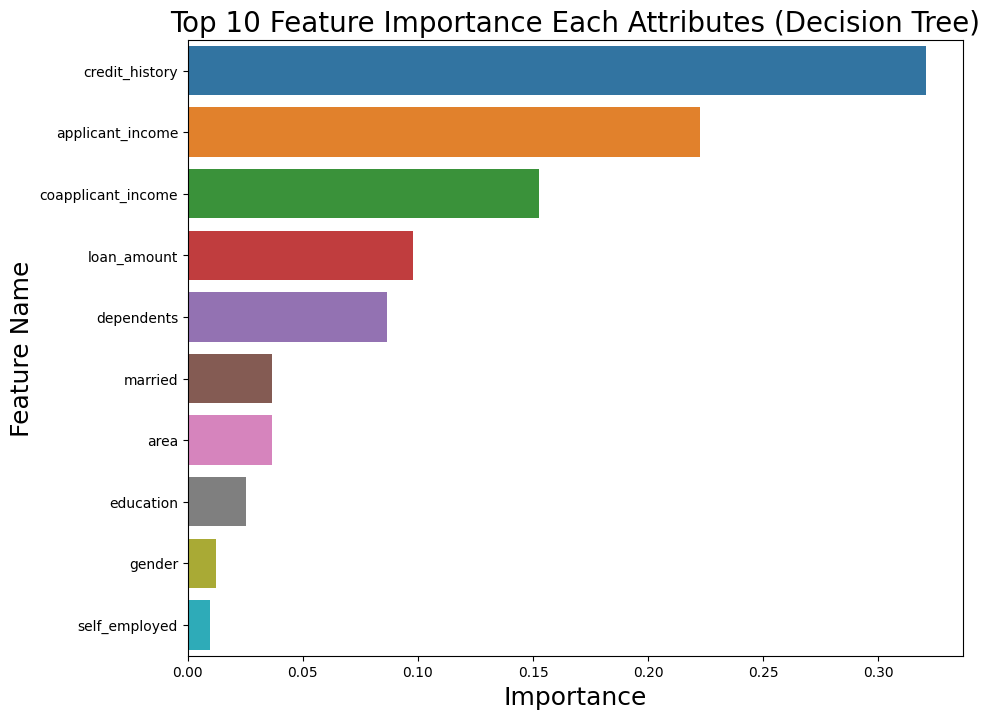

In [486]:
# Create a DataFrame to store the feature importances from the Decision Tree model
imp_df1 = pd.DataFrame({
    'Feature Name': X_train.columns, 
    'Importance': dtree_best.feature_importances_})

fi1 = imp_df1.sort_values(by='Importance', ascending=False) # Sort the DataFrame by importance in descending order
fi2 = fi1.head(10) # Select the top 10 features with the highest importances

# Create a bar plot to visualize the top 10 feature importances
plt.figure(figsize=(10, 8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=20)
plt.xlabel('Importance', fontsize=18)
plt.ylabel('Feature Name', fontsize=18)
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


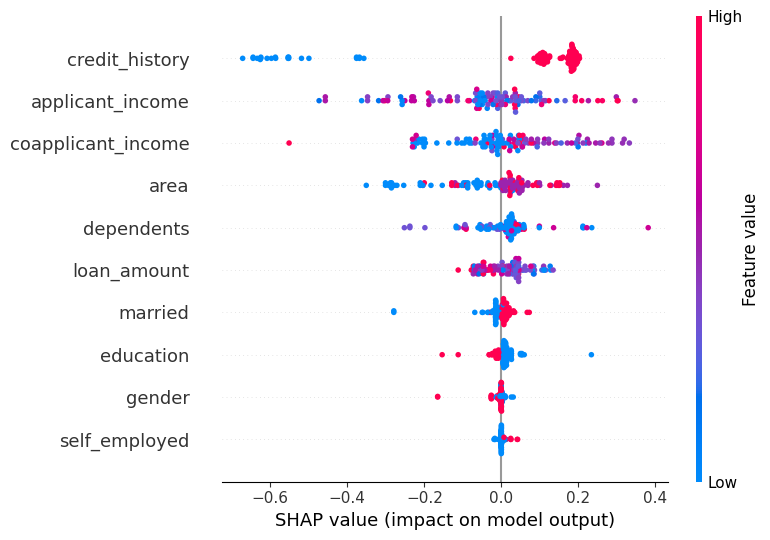

In [487]:
explainer = shap.TreeExplainer(dtree_best) # Create a SHAP TreeExplainer object for the Decision Tree model
shap_values = explainer.shap_values(X_test) # Calculate the SHAP values for the test data using the TreeExplainer
shap.summary_plot(shap_values[1], X_test.values, feature_names=X_test.columns) # Create a summary plot to visualize the SHAP values with a custom colormap

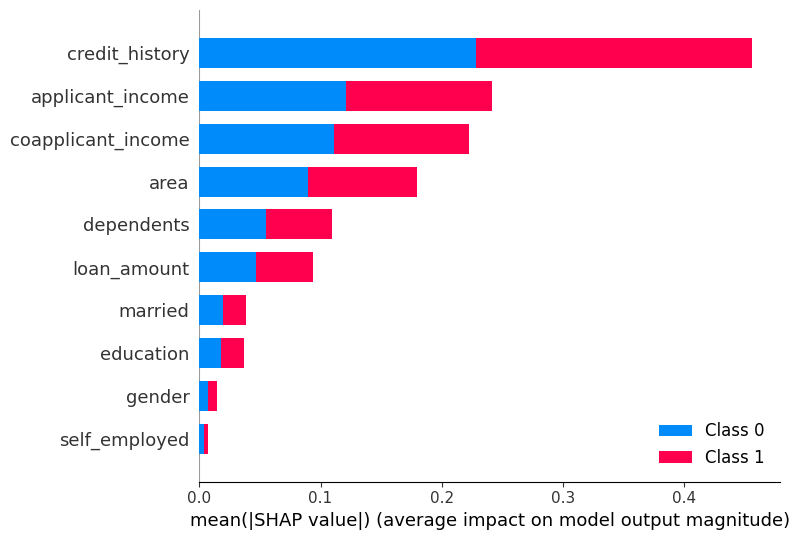

In [488]:
explainer = shap.TreeExplainer(dtree_best) # Create a SHAP TreeExplainer object for the Decision Tree model
shap_values = explainer.shap_values(X_test) # Calculate the SHAP values for the test data using the TreeExplainer
shap.summary_plot(shap_values, X_test) # Create a summary plot to visualize the SHAP values

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.9210526315789473')

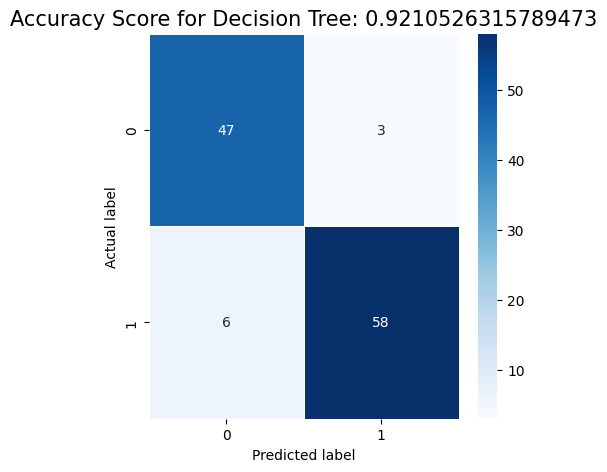

In [489]:
# Calculate the confusion matrix for the predictions made by the Decision Tree model
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(data=cm, linewidths=0.5, annot=True, cmap='Blues')

# Set the axis labels and the title of the plot
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree_best.score(X_test, y_test))
plt.title(all_sample_title, size=15)

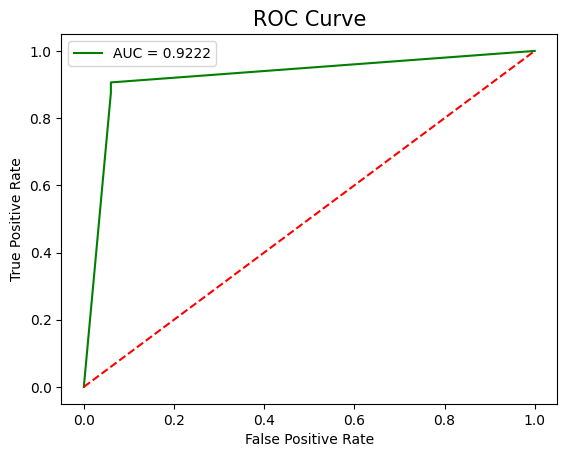

In [490]:
# Predict probabilities for the positive class using the best Decision Tree model
y_pred_proba = dtree_best.predict_proba(X_test)[:, 1]

# Create a DataFrame containing the actual labels and predicted probabilities
df1_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df1_actual_predicted.index = y_test.index

# Calculate the False Positive Rate (fpr), True Positive Rate (tpr), and Threshold (tr) for the ROC curve
fpr, tpr, tr = roc_curve(df1_actual_predicted['y_actual'], df1_actual_predicted['y_pred_proba'])

auc = roc_auc_score(df1_actual_predicted['y_actual'], df1_actual_predicted['y_pred_proba']) # Calculate the Area Under the ROC Curve (AUC)

plt.plot(fpr, tpr, label='AUC = %0.4f' % auc, color='green') # Plot the ROC curve with the AUC value as the label

plt.plot(fpr, fpr, linestyle='--', color='red') # Plot the diagonal line representing random guessing

# Set the x and y axis labels and the title of the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size=15)
plt.legend()

## Random Forest
Next, I employ the Random Forest classifier and perform a grid search with cross-validation to find the best hyperparameters. The model is then fitted with the best hyperparameters, and its performance metrics are evaluated, similar to the Decision Tree. Additionally, I analyze feature importance using a bar plot and SHAP values.

In [491]:
# Create a RandomForestClassifier object
rfc = RandomForestClassifier()

# Define the hyperparameter grid for grid search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_) # Print the best hyperparameters

{'max_depth': None, 'max_features': 'log2', 'n_estimators': 200}


In [492]:
# Create a new RandomForestClassifier with the best hyperparameters
rfc_best = RandomForestClassifier(random_state= 50, 
                                  max_features='log2', 
                                  min_samples_split= 2,  
                                  n_estimators=200
)

In [493]:
rfc_best.fit(X_train, y_train) # Fit the model with the best hyperparameters on the training data
y_pred = rfc_best.predict(X_test) # Make predictions on the test data
print("Accuracy Score:", round(accuracy_score(y_test, y_pred), 3)) # Calculate and print the accuracy score of the model

Accuracy Score: 0.912


In [494]:
# Perform cross-validation with 15 folds
num_folds = 15
scores = cross_val_score(rfc_best, X_test, y_test, cv=num_folds)

print("Average Score:", scores.mean())
print("Standard Deviation:", scores.std())
print("Range:", (scores.mean() - scores.std()), (scores.mean() + (scores.std())))

Average Score: 0.8190476190476191
Standard Deviation: 0.12540184840251137
Range: 0.6936457706451078 0.9444494674501305


In [495]:
print('F1 Score:', round(f1_score(y_test, y_pred, average='micro'), 3))
print('Precision Score:', round(precision_score(y_test, y_pred, average='micro'), 3))
print('Recall Score:', round(recall_score(y_test, y_pred, average='micro'), 3))
print('Jaccard Score:', round(jaccard_score(y_test, y_pred, average='micro'), 3))
print('Log Loss:', round(log_loss(y_test, y_pred), 3))

F1 Score: 0.912
Precision Score: 0.912
Recall Score: 0.912
Jaccard Score: 0.839
Log Loss: 3.162


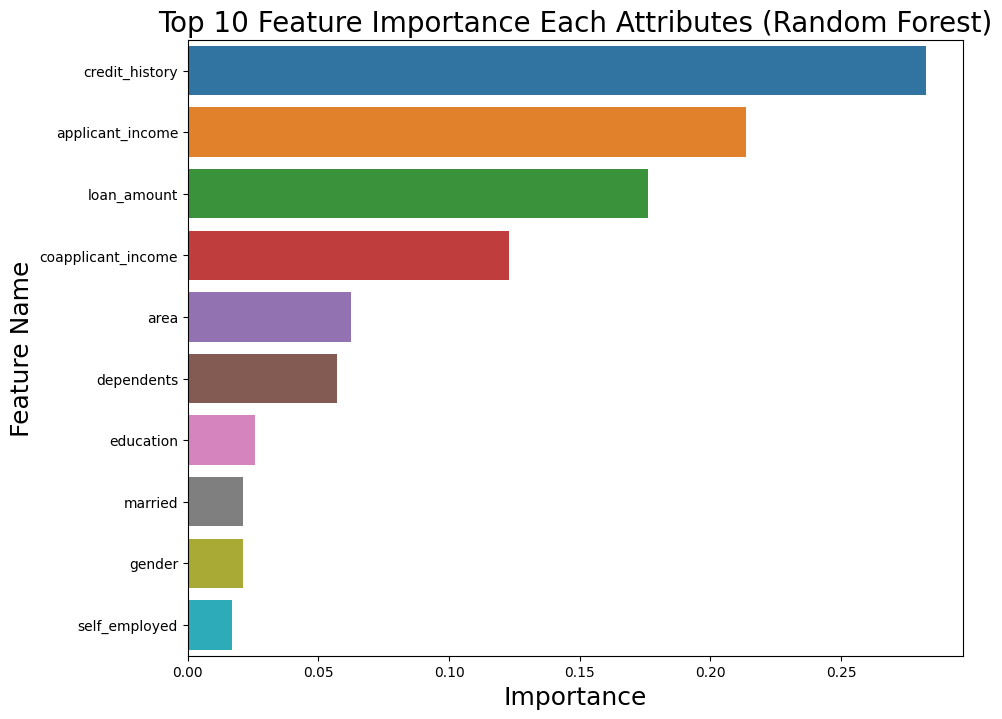

In [496]:
# Create a DataFrame to store the feature importances from the Random Forest model
imp_df1 = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc_best.feature_importances_
})

fi1 = imp_df1.sort_values(by="Importance", ascending=False) # Sort the DataFrame in descending order based on feature importance
fi2 = fi1.head(10) # Select the top 10 important features

# Plot the top 10 feature importances using a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=20)
plt.xlabel('Importance', fontsize=18)
plt.ylabel('Feature Name', fontsize=18)
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


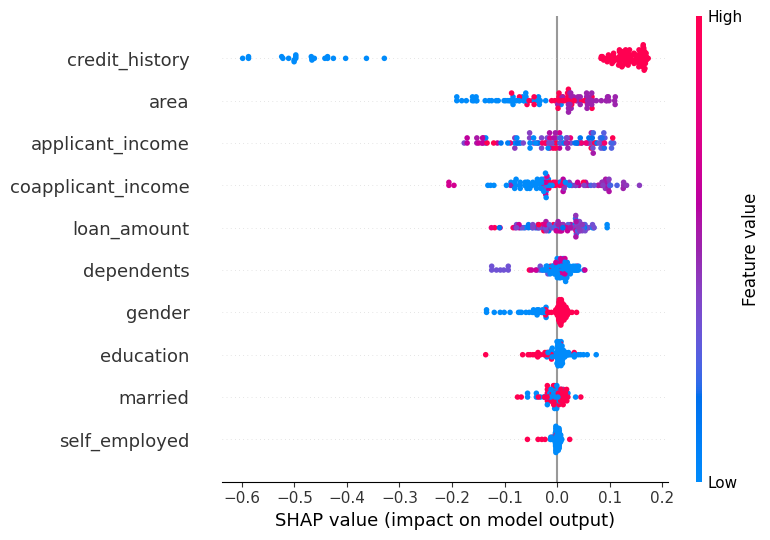

In [497]:
explainer = shap.TreeExplainer(rfc_best) # Create a SHAP TreeExplainer object for the Random Forest model
shap_values = explainer.shap_values(X_test) # Calculate SHAP values for the test data
shap.summary_plot(shap_values[1], X_test.values, feature_names=X_test.columns) # Plot SHAP summary plot for class 1 with custom colormap

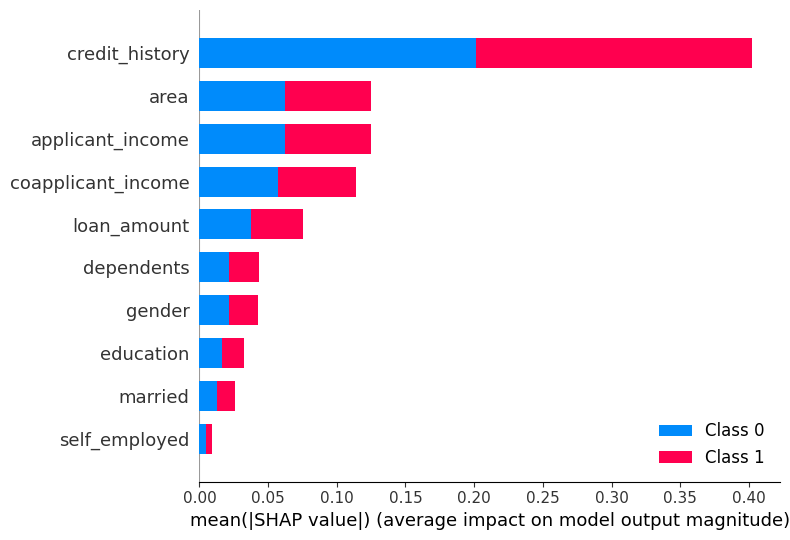

In [498]:
# Create a SHAP TreeExplainer object for the Random Forest model
explainer = shap.TreeExplainer(rfc_best)

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test)

# Create a summary plot to visualize the SHAP values for each feature in the test data
shap.summary_plot(shap_values, X_test)

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.9122807017543859')

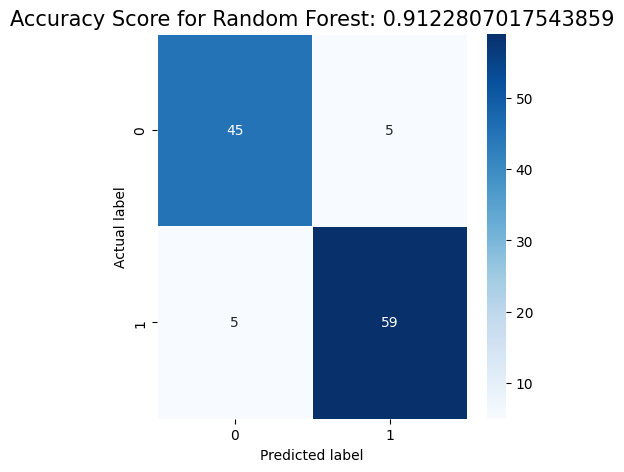

In [499]:
# Calculate the confusion matrix using the true test labels (y_test) and the predicted labels (y_pred)
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(data=cm, linewidths=.5, annot=True, cmap='Blues')

# Set labels for the x and y axes
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Create a title for the plot with the accuracy score for the Random Forest model
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc_best.score(X_test, y_test))
plt.title(all_sample_title, size=15)

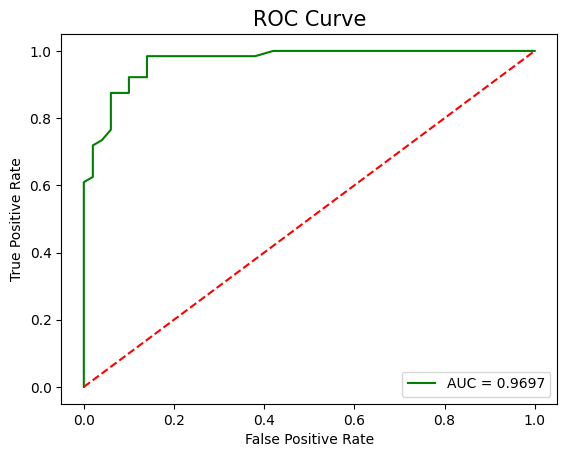

In [500]:
# Calculate predicted probabilities for the positive class ('Y')
y_pred_proba = rfc_best.predict_proba(X_test)[:][:, 1]

# Combine actual test labels and predicted probabilities into a DataFrame
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)

# Compute False Positive Rate (fpr), True Positive Rate (tpr), and Thresholds (tr) for the ROC curve
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

# Calculate Area Under the Curve (AUC) score for the ROC curve
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

# Plot the ROC curve with FPR and TPR, and display AUC value as the label
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc, color= 'green')

# Plot the dotted line representing the random classifier (FPR = TPR)
plt.plot(fpr, fpr, linestyle='--', color='red')

# Set labels for x and y axes, and add title to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size=15)
plt.legend()

## *`Conclusion:`*
This project successfully achieved its goal of predicting loan status (Approved or Not Approved) based on various applicant features using Decision Tree and Random Forest classifiers. The data was carefully explored, preprocessed, and visualized to ensure the models could be trained effectively. Class imbalance was addressed through upsampling the minority class, and outliers were removed using the IQR method to improve model performance.

The Decision Tree classifier achieved an impressive accuracy score of 0.921, while the Random Forest classifier also demonstrated strong performance with an accuracy score of 0.912. These results indicate that both models are reliable in predicting loan statuses, but it's essential to remember that this analysis solely focuses on loan approval status and not on the borrowers' ability to repay the loan.

It's crucial to consider that predicting loan approval status is just one aspect of the lending process, and other factors, such as borrowers' repayment capabilities, creditworthiness, and financial stability, should also be thoroughly assessed before making any lending decisions. While this project provides a valuable starting point for understanding loan status prediction, the practical implementation of such models in a real-world lending scenario requires additional considerations, validations, and external data sources.